In [11]:
# Netflix Exploratory Data Analysis

## 1. Data Loading

## 2. Data Cleaning

## 3. Exploratory Analysis

## 4. Business Insights

## 5. Conclusion


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


In [2]:
df = pd.read_csv("netflix_titles.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

df.head()


Dataset Loaded Successfully!
Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.isnull().sum()  
#This is use to check the null
# Check Missing Values 

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added         0
month_added        0
duration_number    3
primary_genre      0
primary_country    0
dtype: int64

In [4]:
# Check Missing Values

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

df = df.dropna(subset=['date_added'])

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['duration_number'] = df['duration'].str.extract(r'(\d+)')
df['duration_number'] = pd.to_numeric(df['duration_number'], errors='coerce')

df['primary_genre'] = df['listed_in'].apply(lambda x: str(x).split(',')[0])
df['primary_country'] = df['country'].apply(lambda x: str(x).split(',')[0])

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_number,primary_genre,primary_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,Documentaries,United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,International TV Shows,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,Crime TV Shows,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,Docuseries,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,International TV Shows,India


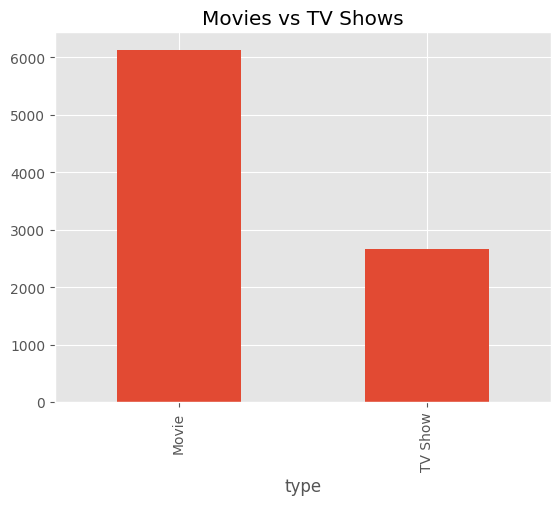

In [5]:
# Movies vs TV Shows

df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows")
plt.show()


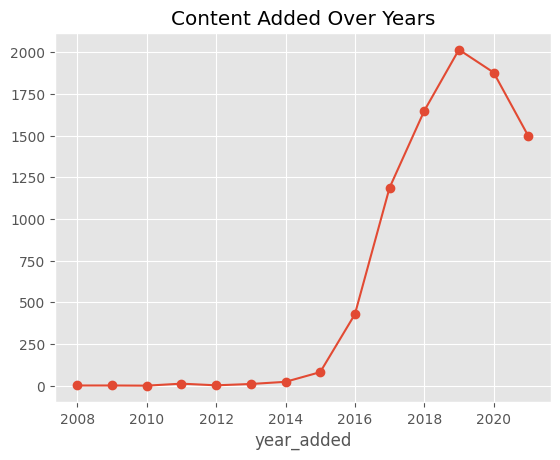

In [6]:
# Content Growth Over Years

df['year_added'].value_counts().sort_index().plot(marker='o')
plt.title("Content Added Over Years")
plt.show()


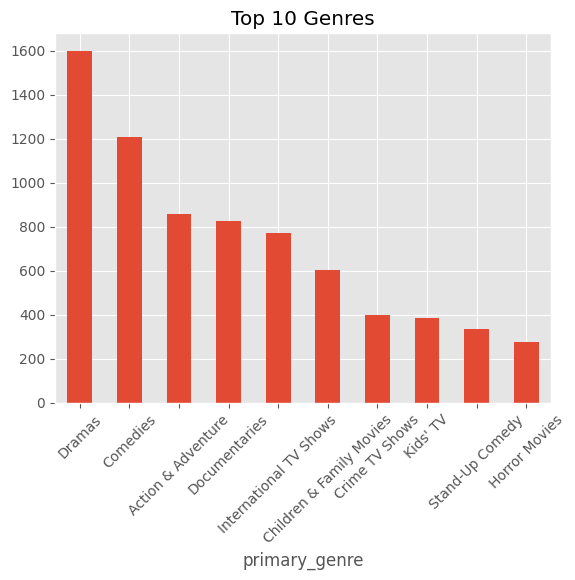

In [7]:
# Top 10 Genres

df['primary_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.xticks(rotation=45)
plt.show()


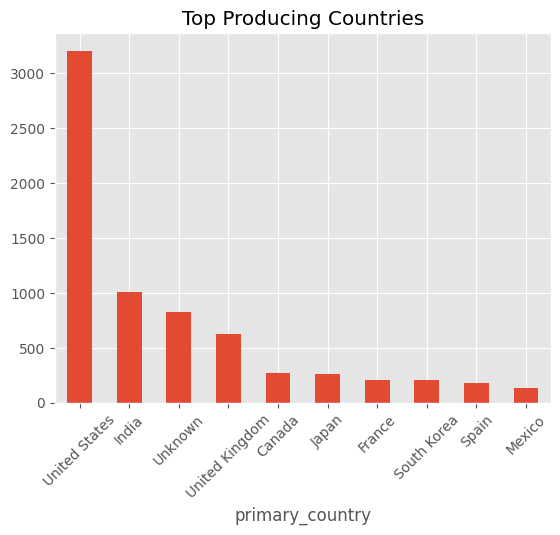

In [8]:
# Top Countries

df['primary_country'].value_counts().head(10).plot(kind='bar')
plt.title("Top Producing Countries")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Business Insights

print("Total Movies:", df[df['type']=='Movie'].shape[0])
print("Total TV Shows:", df[df['type']=='TV Show'].shape[0])
print("Most Popular Genre:", df['primary_genre'].value_counts().idxmax())
print("Top Producing Country:", df['primary_country'].value_counts().idxmax())
print("Peak Year:", df['year_added'].value_counts().idxmax())


Total Movies: 6131
Total TV Shows: 2666
Most Popular Genre: Dramas
Top Producing Country: United States
Peak Year: 2019
